<a href="https://colab.research.google.com/github/HoanDiep/BT5_tuan6__Fuzzy_tri_tue_nhan_tao/blob/main/temperatureControl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy

109.5342641117711


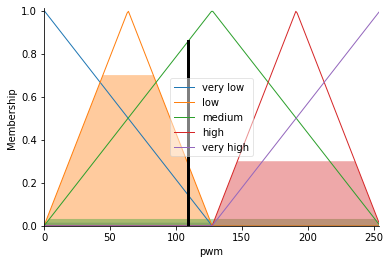

In [3]:
# Temperature level control

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

sensor = ctrl.Antecedent(np.arange(-3, 60.5, 0.25),'sensor')
setpoint = ctrl.Antecedent(np.arange(12, 32.5, 0.5),'setpoint')

pwm = ctrl.Consequent(np.arange(0, 255, 1),'pwm')

sensor['very low'] = fuzz.trimf(sensor.universe,[-3, -3, 31.5])
sensor['low'] = fuzz.trimf(sensor.universe,[-3, 15.75, 31.5])
sensor['medium'] = fuzz.trimf(sensor.universe,[15.75, 31.5, 47.25])
sensor['high'] = fuzz.trimf(sensor.universe,[31.5, 47.25, 60])
sensor['very high'] = fuzz.trimf(sensor.universe,[31.75, 60, 60])

setpoint['low'] = fuzz.trimf(setpoint.universe,[12, 12, 22])
setpoint['medium'] = fuzz.trimf(setpoint.universe,[12, 22, 32])
setpoint['high'] = fuzz.trimf(setpoint.universe,[22, 32, 32])

pwm['very low'] = fuzz.trimf(pwm.universe,[0, 0, 127.5])
pwm['low'] = fuzz.trimf(pwm.universe,[0, 63.75, 127.5])
pwm['medium'] = fuzz.trimf(pwm.universe,[0, 127.5, 255])
pwm['high'] = fuzz.trimf(pwm.universe,[127.5, 191.25, 255])
pwm['very high'] = fuzz.trimf(pwm.universe,[127.5, 255, 255])

rule1 = ctrl.Rule(setpoint['low'] & sensor['very low'], pwm['very low'])
rule2 = ctrl.Rule(setpoint['low'] & sensor['low'], pwm['very low'])
rule3 = ctrl.Rule(setpoint['low'] & sensor['medium'], pwm['low'])
rule4 = ctrl.Rule(setpoint['low'] & sensor['high'], pwm['medium'])
rule5 = ctrl.Rule(setpoint['low'] & sensor['very high'], pwm['medium'])

rule6 = ctrl.Rule(setpoint['medium'] & sensor['very low'], pwm['very low'])
rule7 = ctrl.Rule(setpoint['medium'] & sensor['low'], pwm['low'])
rule8 = ctrl.Rule(setpoint['medium'] & sensor['medium'], pwm['low'])
rule9 = ctrl.Rule(setpoint['medium'] & sensor['high'], pwm['medium'])
rule10 = ctrl.Rule(setpoint['medium'] & sensor['very high'], pwm['high'])

rule11 = ctrl.Rule(setpoint['high'] & sensor['very low'], pwm['medium'])
rule12 = ctrl.Rule(setpoint['high'] & sensor['low'], pwm['medium'])
rule13 = ctrl.Rule(setpoint['high'] & sensor['medium'], pwm['high'])
rule14 = ctrl.Rule(setpoint['high'] & sensor['high'], pwm['very high'])
rule15 = ctrl.Rule(setpoint['high'] & sensor['very high'], pwm['very high'])

rule = []

for i in range (1,16):
      rule.append(locals()['rule'+str(i)])
pwm_ctrl = ctrl.ControlSystem(rule)
    
pwm_es=ctrl.ControlSystemSimulation(pwm_ctrl)
pwm_es.input['sensor']=31
pwm_es.input['setpoint']=25
pwm_es.compute()
print(pwm_es.output['pwm'])
pwm.view(sim=pwm_es)